In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

In [2]:
import pandas
filename = 'online_shoppers_intention.csv'
data = pandas.read_csv(filename, header=0)

print("Número de muestras: ", data.shape[0])
print("Número de características: ", data.shape[1])

Número de muestras:  12330
Número de características:  18


In [3]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [6]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [7]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [8]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data["Weekend"] = data["Weekend"].astype(int)

In [11]:
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [12]:
data['Revenue'] = data["Revenue"].astype(int)

In [13]:
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [14]:
data['Month'] = data['Month'].astype('str')

In [15]:
data['Month'] = np.where(data['Month']=="Feb", 0, data['Month'])
data['Month'] = np.where(data['Month']=="Mar", 1, data['Month'])
data['Month'] = np.where(data['Month']=="May", 2, data['Month'])
data['Month'] = np.where(data['Month']=="June", 3, data['Month'])
data['Month'] = np.where(data['Month']=="Jul", 4, data['Month'])
data['Month'] = np.where(data['Month']=="Aug", 5, data['Month'])
data['Month'] = np.where(data['Month']=="Sep", 6, data['Month'])
data['Month'] = np.where(data['Month']=="Oct", 7, data['Month'])
data['Month'] = np.where(data['Month']=="Nov", 8, data['Month'])
data['Month'] = np.where(data['Month']=="Dec", 9, data['Month'])
    

In [16]:
data['Month'].value_counts()

2    3364
8    2998
1    1907
9    1727
7     549
6     448
5     433
4     432
3     288
0     184
Name: Month, dtype: int64

In [17]:
data['VisitorType'] = np.where(data['VisitorType']=="Returning_Visitor", 0, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="New_Visitor", 1, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="Other", 2, data['VisitorType'])

In [18]:
data['VisitorType'].value_counts()

0    10551
1     1694
2       85
Name: VisitorType, dtype: int64

In [19]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,0,3,3,1,4,0,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,0,2,2,1,3,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,0,2,4,3,3,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,0,1,2,1,5,0,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,0,2,2,2,3,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,0,2,4,1,2,0,0,0


In [20]:
data['Month'] = data['Month'].astype('int')

In [21]:
data['VisitorType'] = data['VisitorType'].astype('str').astype('int')

In [22]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [23]:
X = data.drop('Revenue', axis=1)
Y = data["Revenue"]
print(X.shape, Y.shape)

(12330, 17) (12330,)


Validación

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X)


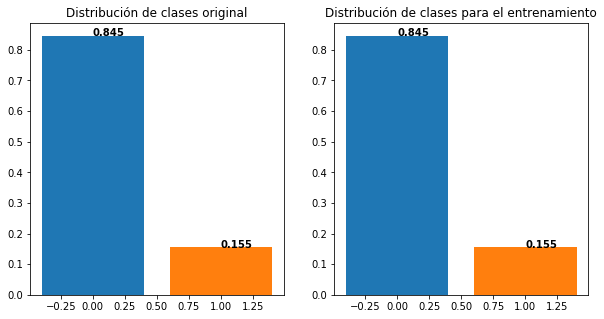

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(0,np.sum(Y==0)/Y.shape[0])
plt.bar(1,np.sum(Y==1)/Y.shape[0])
plt.title('Distribución de clases original')
for i in range(2):
    plt.text(i, np.sum(Y==i)/Y.shape[0], str(round(np.sum(Y==i)/Y.shape[0],3)), color='black', fontweight='bold')
#--------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
plt.subplot(1,2,2)
plt.bar(0,np.sum(y_train==0)/y_train.shape[0])
plt.bar(1,np.sum(y_train==1)/y_train.shape[0])
for i in range(2):
    plt.text(i, np.sum(y_train==i)/y_train.shape[0], str(round(np.sum(y_train==i)/y_train.shape[0],3)), color='black', fontweight='bold')
plt.title('Distribución de clases para el entrenamiento')
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

def calculateAUC(clf):
    prob_y_0 = clf.predict_proba(X_test)
    
    prob_y_0 = [p[1] for p in prob_y_0]

    print( roc_auc_score(y_test, prob_y_0) )

In [27]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [28]:
calculateAUC(clf)

0.8783972374913325


Modelos

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred) 

0.8231954582319546

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

Este tiene como medida de desempeño AUC y el accuracy, sólo puse el accuracy como para ver algo, pero en sí se usa sin el accuracy, sólo con el AUC, esa es la prueba que está después de esta.

In [34]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
parameters = {'svc__kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
              'svc__gamma':('scale','auto')}

pp = make_pipeline(StandardScaler(), SVC(probability = True))

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, Y)
results = gs.cv_results_

In [35]:
data = pandas.DataFrame(results)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,param_svc__kernel,params,split0_test_AUC,split1_test_AUC,mean_test_AUC,...,std_train_AUC,split0_test_Accuracy,split1_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,11.102225,4.070997,0.672859,0.141613,scale,linear,"{'svc__gamma': 'scale', 'svc__kernel': 'linear'}",0.958973,0.776065,0.867519,...,0.057402,0.884185,0.869586,0.876886,0.007299,1,0.870073,0.914031,0.892052,0.021979
1,8.327906,1.890490,0.729581,0.120374,scale,poly,"{'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.684956,0.782039,0.733497,...,0.041540,0.861800,0.751987,0.806894,0.054907,5,0.882725,0.925710,0.904217,0.021492
2,6.676134,1.606562,1.022302,0.118314,scale,rbf,"{'svc__gamma': 'scale', 'svc__kernel': 'rbf'}",0.724170,0.796621,0.760396,...,0.042410,0.864396,0.811841,0.838118,0.026277,4,0.892295,0.931711,0.912003,0.019708
3,3.884829,0.849261,0.798598,0.079851,scale,sigmoid,"{'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}",0.805632,0.608061,0.706847,...,0.011441,0.856123,0.522303,0.689213,0.166910,8,0.815572,0.870235,0.842903,0.027332
4,11.286431,3.963326,0.728262,0.131997,auto,linear,"{'svc__gamma': 'auto', 'svc__kernel': 'linear'}",0.958973,0.776065,0.867519,...,0.057402,0.884185,0.869586,0.876886,0.007299,1,0.870073,0.914031,0.892052,0.021979
5,9.107193,1.361017,0.782861,0.045263,auto,poly,"{'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.684889,0.782039,0.733464,...,0.042556,0.861152,0.751987,0.806569,0.054582,6,0.881427,0.925710,0.903569,0.022141
6,7.491148,1.172731,1.171989,0.164102,auto,rbf,"{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}",0.728851,0.796621,0.762736,...,0.043699,0.864720,0.811841,0.838281,0.026440,3,0.891646,0.931711,0.911679,0.020032
7,4.612612,1.060933,0.937145,0.110136,auto,sigmoid,"{'svc__gamma': 'auto', 'svc__kernel': 'sigmoid'}",0.734484,0.608061,0.671273,...,0.030301,0.872668,0.522303,0.697486,0.175182,7,0.812328,0.870235,0.841281,0.028954


In [36]:
gs.best_params_

{'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [40]:
scoring = {'AUC': 'roc_auc'}
parameters = {'svc__kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
              'svc__gamma':('scale','auto')}

pp = make_pipeline(StandardScaler(), SVC(probability = True))

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, Y)
results = gs.cv_results_

In [41]:
data = pandas.DataFrame(results)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,param_svc__kernel,params,split0_test_AUC,split1_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,mean_train_AUC,std_train_AUC
0,10.801720,3.768610,0.343833,0.046801,scale,linear,"{'svc__gamma': 'scale', 'svc__kernel': 'linear'}",0.958973,0.776065,0.867519,0.091454,1,0.837059,0.951864,0.894461,0.057402
1,7.597193,1.811682,0.374994,0.047039,scale,poly,"{'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.684956,0.782039,0.733497,0.048541,5,0.876802,0.959881,0.918341,0.041540
2,6.490710,1.396955,0.559370,0.075004,scale,rbf,"{'svc__gamma': 'scale', 'svc__kernel': 'rbf'}",0.724170,0.796621,0.760396,0.036226,4,0.887977,0.972797,0.930387,0.042410
3,3.751912,0.673637,0.464794,0.089817,scale,sigmoid,"{'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}",0.805632,0.608061,0.706847,0.098785,7,0.692502,0.715384,0.703943,0.011441
4,10.715235,3.855698,0.351487,0.054615,auto,linear,"{'svc__gamma': 'auto', 'svc__kernel': 'linear'}",0.958973,0.776065,0.867519,0.091454,1,0.837059,0.951864,0.894461,0.057402
5,7.947528,1.202875,0.367185,0.054689,auto,poly,"{'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.684889,0.782039,0.733464,0.048575,6,0.874769,0.959881,0.917325,0.042556
6,6.386152,1.410760,0.562503,0.062486,auto,rbf,"{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}",0.728851,0.796621,0.762736,0.033885,3,0.885398,0.972797,0.929097,0.043699
7,3.899287,0.733712,0.458943,0.068151,auto,sigmoid,"{'svc__gamma': 'auto', 'svc__kernel': 'sigmoid'}",0.734484,0.608061,0.671273,0.063211,8,0.654782,0.715384,0.685083,0.030301


In [42]:
gs.best_params_

{'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

#model=
#parameters = {'kernel': ('linear', 'rbf'),  'gamma': ([0.125, 0.25, 0.5])}
#clf = GridSearchCV(model, param_grid=parameters, cv=5)
#grid_search = clf.fit(X_train, y_train)

#print("Best score: %0.3f" % grid_search.best_score_)
#print(grid_search.best_estimator_)

scoring = {'AUC': 'roc_auc'}
parameters = {'gradientboostingclassifier__loss':('deviance', 'exponential'), 
              'gradientboostingclassifier__learning_rate':([0.1,0.01,0.001]), #,0.00001,0.000001
              'gradientboostingclassifier__n_estimators':([10,100,1000]),
             }

pp = make_pipeline(StandardScaler(), GradientBoostingClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, Y)
results = gs.cv_results_

In [46]:
data = pandas.DataFrame(results)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__learning_rate,param_gradientboostingclassifier__loss,param_gradientboostingclassifier__n_estimators,params,split0_test_AUC,split1_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,mean_train_AUC,std_train_AUC
0,0.192001,0.007013,0.018503,0.000517,0.1,deviance,10,{'gradientboostingclassifier__learning_rate': ...,0.938779,0.814879,0.876829,0.061950,4,0.894539,0.975078,0.934809,0.040269
1,1.367507,0.112490,0.027983,0.002997,0.1,deviance,100,{'gradientboostingclassifier__learning_rate': ...,0.938481,0.792632,0.865556,0.072924,10,0.925879,0.987557,0.956718,0.030839
2,11.871983,0.287975,0.186921,0.015088,0.1,deviance,1000,{'gradientboostingclassifier__learning_rate': ...,0.902878,0.765504,0.834191,0.068687,17,0.992421,0.999987,0.996204,0.003783
3,0.241002,0.009024,0.021497,0.001487,0.1,exponential,10,{'gradientboostingclassifier__learning_rate': ...,0.939520,0.814261,0.876890,0.062630,3,0.894520,0.974162,0.934341,0.039821
4,1.181993,0.057018,0.030490,0.000501,0.1,exponential,100,{'gradientboostingclassifier__learning_rate': ...,0.939231,0.797415,0.868323,0.070908,8,0.925996,0.986410,0.956203,0.030207
5,11.830963,0.322946,0.192028,0.008028,0.1,exponential,1000,{'gradientboostingclassifier__learning_rate': ...,0.892412,0.771363,0.831888,0.060524,18,0.993204,0.999976,0.996590,0.003386
6,0.255000,0.030991,0.020486,0.002502,0.01,deviance,10,{'gradientboostingclassifier__learning_rate': ...,0.925202,0.799305,0.862254,0.062949,11,0.869663,0.969809,0.919736,0.050073
7,2.208562,0.244446,0.061434,0.023551,0.01,deviance,100,{'gradientboostingclassifier__learning_rate': ...,0.938920,0.815319,0.877119,0.061801,1,0.894815,0.975156,0.934985,0.040171
8,12.101578,0.711562,0.159413,0.010561,0.01,deviance,1000,{'gradientboostingclassifier__learning_rate': ...,0.939742,0.792997,0.866369,0.073373,9,0.925199,0.987480,0.956340,0.031141
9,0.153499,0.003500,0.014504,0.000492,0.01,exponential,10,{'gradientboostingclassifier__learning_rate': ...,0.925201,0.798821,0.862011,0.063190,14,0.868673,0.968911,0.918792,0.050119


In [47]:
gs.best_params_

{'gradientboostingclassifier__learning_rate': 0.01,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__n_estimators': 100}